In [1]:
import os

In [2]:
os.chdir("G:/PAPER/BioPrinHBB/undirected/")

In [3]:
import networkx as nx

# Read GraphML file
G = nx.read_graphml("domain_undirected_p-0_m-5.graphml")

# Edge & Node Information
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

# Check node attributes
sample_node = list(G.nodes())[0]
print("Example Node Attributes:", G.nodes[sample_node])


Nodes: 1954
Edges: 3254
Example Node Attributes: {'pfam_accession': 'PF01380', 'name': 'SIS\n2542 proteins\n143-386-261-250', 'protein_contain_this_domain': 'JAFRBZ010000046.1__90210_90632_#10\nCACYGF010000001.1__45137_45633_#10\nJAGACE010000154.1__8321_8811_#2\nJAFEMY010000016.1__18763_19325_#11\nJAHAFB010000013.1__18996_19128_#15\nJAFXUN010000017.1__4723_5375_#2\nJACVWB010000002.1__34937_35165_#8\nJACVWE010000003.1__266015_266243_#8\nJADGMN010000001.1__515198_516016_#8\nCAAKCV010000003.1__182777_183200_#13\nCAAKFM010000001.1__277114_277337_#13\nCAAKFM010000001.1__275350_275640_#14\nFADV01000461.1__1680_2171_#0\nADDE01000338.1__10383_11273_#17\nAAXUVI010000141.1__3600_3951_#2\nAAXVKT010000066.1__57_1663_#0\nAAXVKU010000040.1__36_853_#0\nAAXVLC010000029.1__570_2104_#1\nAAXVNA010000005.1__2515_3197_#4\nAAXVNW010000066.1__20_246_#0\nAAXVOQ010000113.1__11536_12359_#8\nAAXVPB010000049.1__21482_22751_#13\nAAXVPQ010000182.1__3538_4876_#2\nAAXVPV010000051.1__2524_3133_#5\nAAXVTG010000124.1__3

In [4]:
sample_edge = list(G.edges())[0]
print("Example Edge Attributes:", G.edges[sample_edge])

Example Edge Attributes: {'pfam_accession': 'PF01380,PF01418', 'annotation': 'SIS domain,Helix-turn-helix domain, rpiR family', 'name': 'C:2501/P:0.98', 'protein_contain_this_domain_pair': 'AAAABH010000021.1__61134_62917_#4\nAAAABJ010000010.1__109554_110034_#4\nAAAABM010000007.1__128322_129518_#4\nAAAACF010000001.1__1189086_1192352_#4\nAAAACW010000007.1__133840_135683_#4\nAAAAEA010000007.1__178475_179805_#4\nAAAHGZ010000014.1__85558_88051_#4\nAAAHKR010000001.1__1167151_1169710_#4\nAAAHLA010000002.1__39_1301_#4\nAAAHMI010000006.1__172936_175625_#4\nAAAHMT010000012.1__5005_6653_#10\nAAAHPD010000001.1__1212097_1214325_#5\nAAAHRL010000007.1__162627_163501_#4\nAAAHTA010000001.1__32691_34010_#14\nAAAHUO010000006.1__156555_158132_#5\nAAAHVI010000021.1__45151_47124_#4\nAAAHVP010000001.1__1150417_1151924_#4\nAAAHWL010000001.1__1156706_1158873_#4\nAAAHXZ010000003.1__421986_423822_#4\nAAAIAY010000001.1__301971_303866_#14\nAAAIBD010000001.1__701279_702804_#4\nAAAIBL010000001.1__673568_675611_#4\nA

In [5]:
import networkx as nx

# Read GraphML file
G = nx.read_graphml("domain_undirected_p-0_m-5.graphml")

# Calculate node weights
for node, data in G.nodes(data=True):
    protein_str = data.get("protein_contain_this_domain", "")
    proteins = protein_str.strip().split("\n") if protein_str else []
    G.nodes[node]["weight"] = len(proteins)

# Calculate edge weights
for u, v, data in G.edges(data=True):
    pair_str = data.get("protein_contain_this_domain_pair", "")
    proteins = pair_str.strip().split("\n") if pair_str else []
    G.edges[u, v]["weight"] = len(proteins)

In [6]:
# Top nodes: most frequently occurring domains
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get("weight", 0), reverse=True)[:20]
print("Top 20 nodes by weight (most frequently occurring domains):")
for node, attr in top_nodes:
    print(f"Node: {node}, Pfam: {attr.get('pfam_accession')}, Weight: {attr['weight']}")

# Top edges: most frequent domain-domain combinations
top_edges = sorted(G.edges(data=True), key=lambda x: x[2].get("weight", 0), reverse=True)[:20]
print("\nTop 20 edges by weight (most frequent domain-domain combinations):")
for u, v, attr in top_edges:
    print(f"Edge: {u} - {v}, Pfam Pair: {attr.get('pfam_accession')}, Weight: {attr['weight']}")

Top 20 nodes by weight (most frequently occurring domains):
Node: PF01867, Pfam: PF01867, Weight: 84169
Node: PF09704, Pfam: PF09704, Weight: 54678
Node: PF08798, Pfam: PF08798, Weight: 48117
Node: PF09707, Pfam: PF09707, Weight: 47408
Node: PF09344, Pfam: PF09344, Weight: 47161
Node: PF00009, Pfam: PF00009, Weight: 42200
Node: PF04389, Pfam: PF04389, Weight: 40744
Node: PF01583, Pfam: PF01583, Weight: 39402
Node: PF13671, Pfam: PF13671, Weight: 38664
Node: PF09827, Pfam: PF09827, Weight: 32447
Node: PF00113, Pfam: PF00113, Weight: 32252
Node: PF03952, Pfam: PF03952, Weight: 32196
Node: PF00117, Pfam: PF00117, Weight: 29350
Node: PF07690, Pfam: PF07690, Weight: 28956
Node: PF13395, Pfam: PF13395, Weight: 28242
Node: PF06418, Pfam: PF06418, Weight: 28155
Node: PF07722, Pfam: PF07722, Weight: 28039
Node: PF00005, Pfam: PF00005, Weight: 23642
Node: PF00258, Pfam: PF00258, Weight: 22202
Node: PF00175, Pfam: PF00175, Weight: 22161

Top 20 edges by weight (most frequent domain-domain combina

In [7]:
pfam2acc = "../pfam_acc2des.37.1.txt"
descDict = {}
with open(pfam2acc, "r") as fa:
    for faline in fa.readlines():
        pfamid, desc = faline.strip().split("\t")
        descDict[pfamid] = desc

In [8]:
# Top nodes with descriptions
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1].get("weight", 0), reverse=True)[:20]
print("Top 20 domains by occurrence (node weight):")
for node, attr in top_nodes:
    pfam = attr.get("pfam_accession", "NA")
    desc = descDict.get(pfam, "Description not found")
    print(f"[{pfam}] {desc} — Count: {attr['weight']}")

# Top edges with descriptions
top_edges = sorted(G.edges(data=True), key=lambda x: x[2].get("weight", 0), reverse=True)[:20]
print("\nTop 20 domain-domain co-occurrence pairs (edge weight):")
for u, v, attr in top_edges:
    pfam_pair = attr.get("pfam_accession", "NA,NA")
    pfam1, pfam2 = pfam_pair.split(",")
    desc1 = descDict.get(pfam1, "Description not found")
    desc2 = descDict.get(pfam2, "Description not found")
    print(f"[{pfam1}] {desc1} — [{pfam2}] {desc2} — Count: {attr['weight']}")

Top 20 domains by occurrence (node weight):
[PF01867] CRISPR associated protein Cas1 — Count: 84169
[PF09704] CRISPR-associated protein (Cas_Cas5) — Count: 54678
[PF08798] CRISPR associated protein — Count: 48117
[PF09707] CRISPR-associated protein (Cas_Cas2CT1978) — Count: 47408
[PF09344] CT1975-like protein — Count: 47161
[PF00009] Elongation factor Tu GTP binding domain — Count: 42200
[PF04389] Peptidase family M28 — Count: 40744
[PF01583] Adenylylsulphate kinase — Count: 39402
[PF13671] AAA domain — Count: 38664
[PF09827] CRISPR associated protein Cas2 — Count: 32447
[PF00113] Enolase, C-terminal TIM barrel domain — Count: 32252
[PF03952] Enolase, N-terminal domain — Count: 32196
[PF00117] Glutamine amidotransferase class-I — Count: 29350
[PF07690] Major Facilitator Superfamily — Count: 28956
[PF13395] HNH endonuclease — Count: 28242
[PF06418] CTP synthase N-terminus — Count: 28155
[PF07722] Peptidase C26 — Count: 28039
[PF00005] ABC transporter — Count: 23642
[PF00258] Flavodoxin 

In [9]:
knowPfam = "../caspdb_and_caspedia_hmmout_37.1.txt"
knowIDDict  = {}
with open(knowPfam, "r") as fa:
    for faline in fa.readlines():
        if not faline.startswith("#"):
            pfamid = faline.strip().split()[4].split(".")[0]
            if not pfamid in knowIDDict:
                knowIDDict[pfamid] = 1
            else:
                knowIDDict[pfamid] += 1
knowID = []
for keys, values in knowIDDict.items():
    if values >= 10:
        knowID.append(keys)

c:\Users\GolshkovQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Total Cas-related nodes identified in graph: 108


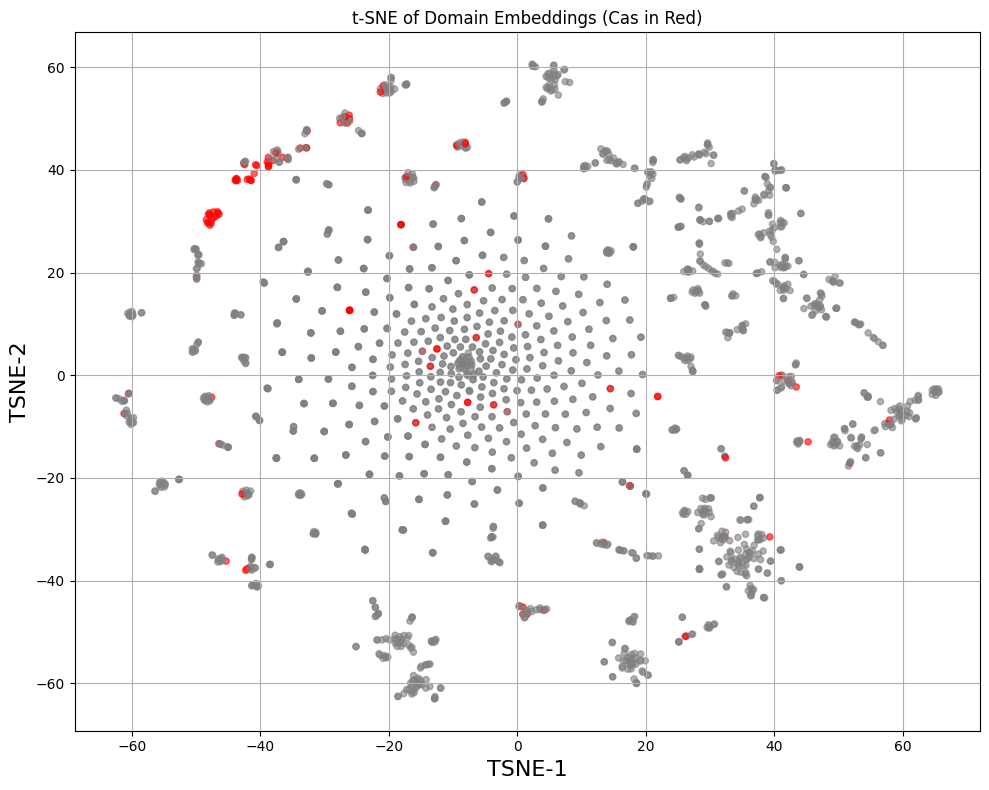

In [10]:
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

knowID = [pfam for pfam, count in knowIDDict.items() if count >= 10]

# Get all Cas-related nodes
cas_nodes = [n for n, d in G.nodes(data=True)
             if d.get("pfam_accession", "").split(".")[0] in knowID]

print(f"Total Cas-related nodes identified in graph: {len(cas_nodes)}")

# Node2Vec Embedding
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4, quiet=True)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get domain vectors
domain_vectors = {node: model.wv[node] for node in G.nodes()}

# Cas-likeness Calculation
cas_vecs = np.array([domain_vectors[n] for n in cas_nodes if n in domain_vectors])
cas_likeness = {}
for node, vec in domain_vectors.items():
    if len(cas_vecs) > 0:
        sim = cosine_similarity(vec.reshape(1, -1), cas_vecs).mean()
    else:
        sim = 0
    cas_likeness[node] = sim

nx.set_node_attributes(G, cas_likeness, "cas_likeness")

# t-SNE Visualization
all_vecs = np.array([domain_vectors[n] for n in G.nodes()])
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vecs)

# plotting
colors = ["red" if n in cas_nodes else "gray" for n in G.nodes()]
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, s=20, alpha=0.6)
plt.title("t-SNE of Domain Embeddings (Cas in Red)")
plt.xlabel("TSNE-1", fontsize=16)
plt.ylabel("TSNE-2", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
node_index = {node: idx for idx, node in enumerate(G.nodes())}

In [13]:
# Check if group1/2_nodes are in the graph
group1_nodes = ['PF04326','PF13412']
group2_nodes = ['PF09848','PF04851']

print("Group 2 nodes:", group2_nodes)

# get indices of group2 nodes in the graph
group2_indices = [list(G.nodes()).index(n) for n in group2_nodes if n in G.nodes()]
group2_tsne = tsne_results[group2_indices] if group2_indices else []

print("Group 2 t-SNE coordinates:", group2_tsne)

if len(group2_tsne) > 0:
    print("Group 2 nodes' coordinates:", group2_tsne)
else:
    print("No green nodes found in the t-SNE plot.")



Group 2 nodes: ['PF09848', 'PF04851']
Group 2 t-SNE coordinates: [[-33.036903  44.31611 ]
 [-33.805977  44.265766]]
Group 2 nodes' coordinates: [[-33.036903  44.31611 ]
 [-33.805977  44.265766]]


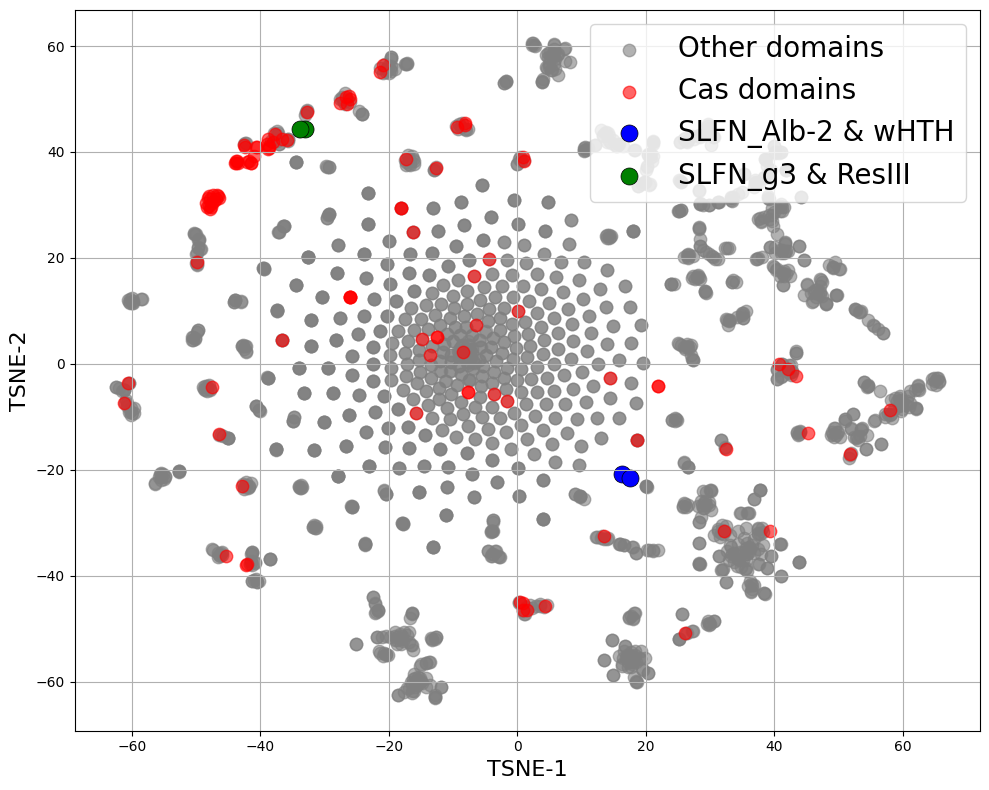

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Draw gray nodes for other domains
other_nodes = [n for n in G.nodes() if n not in cas_nodes]
other_indices = [node_index[n] for n in other_nodes if n in node_index]
plt.scatter(tsne_results[other_indices, 0], tsne_results[other_indices, 1],
            c="gray", s=80, alpha=0.6, label="Other domains")

# Draw red nodes for Cas domains
cas_indices = [node_index[n] for n in cas_nodes if n in node_index]
plt.scatter(tsne_results[cas_indices, 0], tsne_results[cas_indices, 1],
            c="red", s=80, alpha=0.6, label="Cas domains")

group1_indices = [node_index[n] for n in group1_nodes if n in node_index]
group2_indices = [node_index[n] for n in group2_nodes if n in node_index]

# Draw Group1 (blue, fully opaque)
if group1_indices:
    plt.scatter(tsne_results[group1_indices, 0], tsne_results[group1_indices, 1],
                c="blue", s=150, alpha=1.0, label="SLFN_Alb-2 & wHTH", edgecolors='black', linewidths=0.5)

# Draw Group2 (green, fully opaque)
if group2_indices:
    plt.scatter(tsne_results[group2_indices, 0], tsne_results[group2_indices, 1],
                c="green", s=150, alpha=1.0, label="SLFN_g3 & ResIII", edgecolors='black', linewidths=0.5)

#plt.title("t-SNE of Domain Embeddings")
plt.xlabel("TSNE-1", fontsize=16)
plt.ylabel("TSNE-2", fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Get top 20 non-Cas domains based on Cas-likeness
non_cas_nodes = [n for n in G.nodes if n not in cas_nodes]
top_candidates = sorted(non_cas_nodes, key=lambda x: cas_likeness[x], reverse=True)[:20]

print("\nTop 20 Non-Cas domains with highest Cas-likeness:")
for n in top_candidates:
    pfam = G.nodes[n].get("pfam_accession", "NA")
    name = G.nodes[n].get("name", "NA")
    score = cas_likeness[n]
    print(f"{n}\t{pfam}\t{name}\tCas-likeness: {score:.4f}")


Top 20 Non-Cas domains with highest Cas-likeness:
PF20622	PF20622	Big_15
101 proteins
441-1086-531-529	Cas-likeness: 0.6460
PF18449	PF18449	Endotoxin_C2
102 proteins
441-1211-538-529	Cas-likeness: 0.6456
PF13402	PF13402	Peptidase_M60
31 proteins
505-1114-650-623	Cas-likeness: 0.6447
PF17291	PF17291	M60-like_N
29 proteins
505-679-626-623	Cas-likeness: 0.6440
PF02834	PF02834	LigT_PEase
27 proteins
168-243-197-193	Cas-likeness: 0.6430
PF13563	PF13563	2_5_RNA_ligase2
60 proteins
92-257-200-204	Cas-likeness: 0.6414
PF01564	PF01564	Spermine_synth
239 proteins
258-473-290-288	Cas-likeness: 0.6410
PF11800	PF11800	RP-C_C
7 proteins
399-466-422-427	Cas-likeness: 0.6406
PF19298	PF19298	KshA_C
16 proteins
327-428-387-405	Cas-likeness: 0.6405
PF13519	PF13519	VWA_2
43 proteins
124-1280-662-685	Cas-likeness: 0.6404
PF17284	PF17284	Spermine_synt_N
219 proteins
258-413-288-288	Cas-likeness: 0.6403
PF13540	PF13540	RCC1_2
137 proteins
71-2357-657-544	Cas-likeness: 0.6403
PF16539	PF16539	FlgT_M
5 protein

In [ ]:
pfid = 'PF09848'

if pfid not in cas_likeness or pfid not in non_cas_nodes:
    print(f"{pfid} does not exist in the graph or is a Cas domain.")
else:
    target_score = cas_likeness[pfid]

    better_count = sum(1 for x in non_cas_nodes if cas_likeness[x] > target_score)

    rank = better_count + 1
    print(f"{pfid} in rank {rank} among non-Cas domains with Cas-likeness score {target_score:.4f}")


PF09848 in rank 116 among non-Cas domains with Cas-likeness score 0.4827


In [ ]:
pfid = 'PF04326'

if pfid not in cas_likeness or pfid not in non_cas_nodes:
    print(f"{pfid} does not exist in the graph or is a Cas domain.")
else:
    target_score = cas_likeness[pfid]

    better_count = sum(1 for x in non_cas_nodes if cas_likeness[x] > target_score)

    rank = better_count + 1
    print(f"{pfid} in rank {rank} among non-Cas domains with Cas-likeness score {target_score:.4f}")


PF04326 in rank 757 among non-Cas domains with Cas-likeness score 0.4181


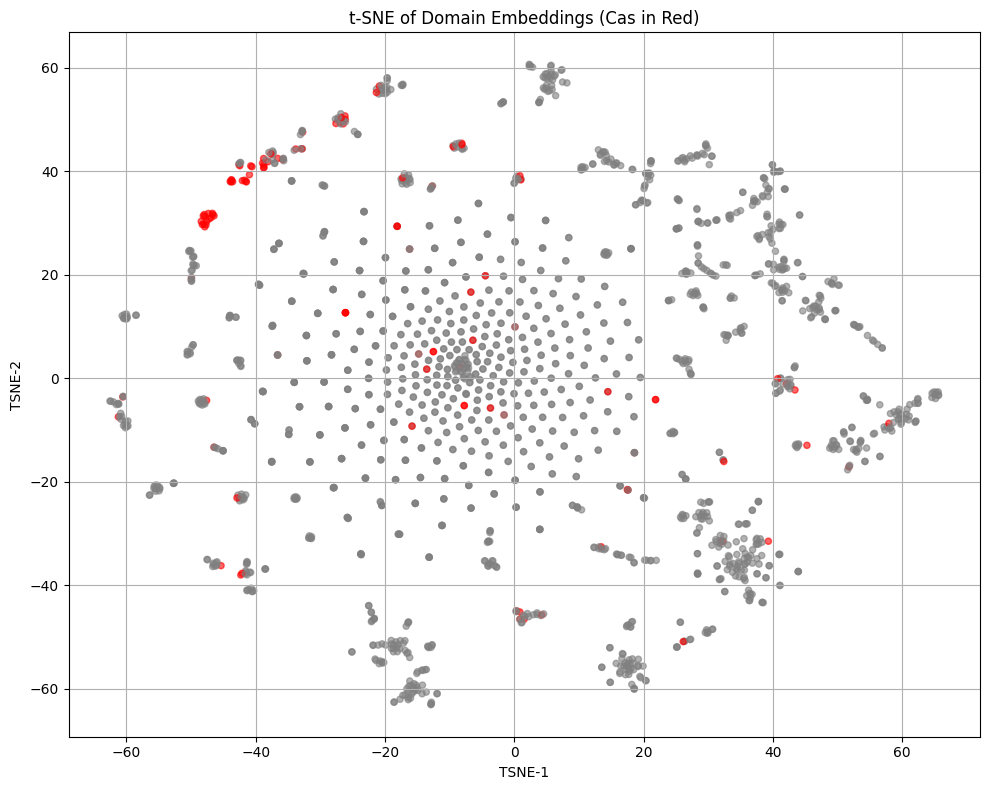

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get all Cas-related nodes
cas_nodes = [n for n, d in G.nodes(data=True)
             if d.get("pfam_accession", "").split(".")[0] in knowID]


# Calculate Cas-likeness
cas_vecs = np.array([domain_vectors[n] for n in cas_nodes if n in domain_vectors])
cas_likeness = {}
for node, vec in domain_vectors.items():
    if len(cas_vecs) > 0:
        sim = np.dot(cas_vecs, vec) / (np.linalg.norm(cas_vecs, axis=1) * np.linalg.norm(vec) + 1e-8)
        sim = sim.mean()
    else:
        sim = 0
    cas_likeness[node] = sim

nx.set_node_attributes(G, cas_likeness, "cas_likeness")

# t-SNE Visualization
all_vecs = np.array([domain_vectors[n] for n in G.nodes()])
tsne = TSNE(n_components=2, perplexity=30, init="pca", learning_rate="auto", random_state=42)
tsne_results = tsne.fit_transform(all_vecs)

# plotting
colors = ["red" if n in cas_nodes else "gray" for n in G.nodes()]
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, s=20, alpha=0.6)
plt.title("t-SNE of Domain Embeddings (Cas in Red)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

OUTPUT_CSV = "domain_vectors_with_cas_likeness.csv"

# Get node attributes and vectors
rows = []
for node in G.nodes():
    pfam_id_full = G.nodes[node].get("pfam_accession", "NA")
    pfam_id = pfam_id_full.split(".")[0]
    desc = descDict.get(pfam_id_full, "Description not found")
    vec = domain_vectors[node]
    likeness = cas_likeness.get(node, 0.0)
    is_known_cas = pfam_id in knowID
    rows.append([pfam_id_full, desc, likeness, is_known_cas] + list(vec))

# get csv
columns = ["Pfam_ID", "Description", "Cas_likeness", "Is_known_Cas"] + [f"Dim_{i+1}" for i in range(len(vec))]
df = pd.DataFrame(rows, columns=columns)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Done! Exported to {OUTPUT_CSV}")


✔ Done! Exported to domain_vectors_with_cas_likeness.csv


In [21]:
import community as community_louvain  # from python-louvain

# Louvain community detection
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, "community")


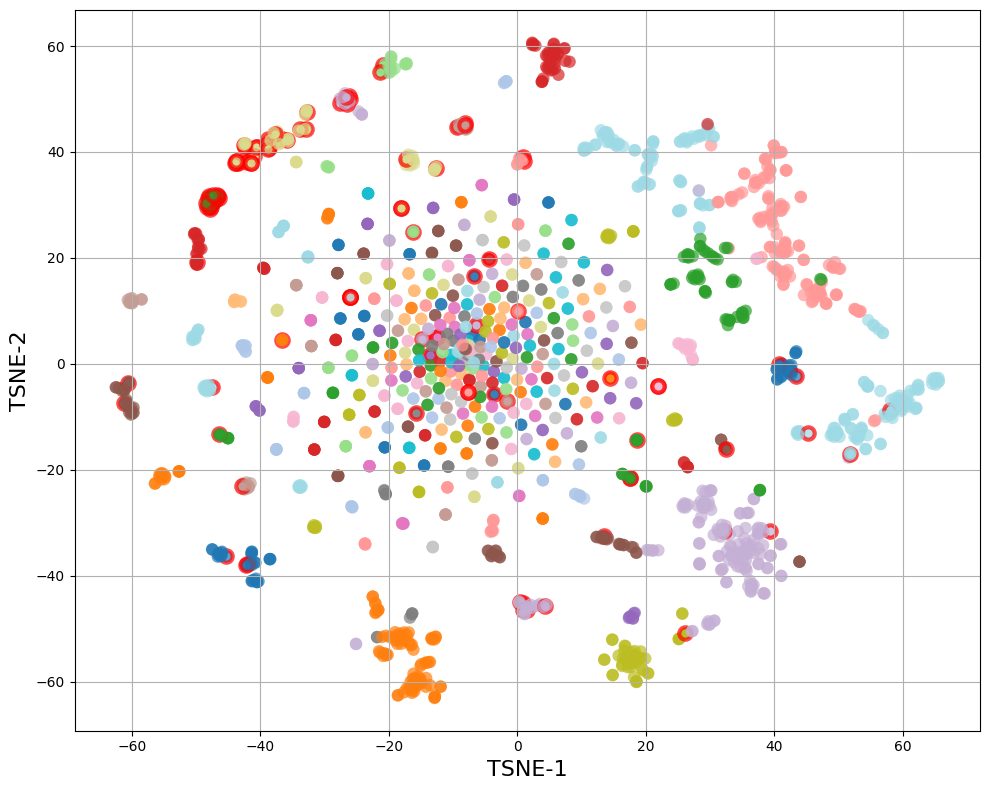

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get all vec and reduce dimensions
all_vecs = np.array([domain_vectors[n] for n in G.nodes()])
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vecs)

# get communities and colors
communities = [G.nodes[n]["community"] for n in G.nodes()]
unique_communities = sorted(set(communities))
color_map = {com: plt.cm.tab20(i % 20) for i, com in enumerate(unique_communities)}
colors = [color_map[G.nodes[n]["community"]] for n in G.nodes()]

# check cas
is_cas = [1 if n in cas_nodes else 0 for n in G.nodes()]

# plotting
plt.figure(figsize=(10, 8))
for i, node in enumerate(G.nodes()):
    x, y = tsne_results[i]
    plt.scatter(x, y, color=colors[i], s=80, alpha=0.7,
                edgecolors="red" if is_cas[i] else "none", linewidths=3 if is_cas[i] else 0.8)

#plt.title("t-SNE of Node2Vec Embeddings — Louvain Communities")
plt.xlabel("TSNE-1", fontsize=16)
plt.ylabel("TSNE-2", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

OUTPUT_CSV = "domain_vectors_with_cas_likeness_community.csv"

# get node attributes and vectors
rows = []
for node in G.nodes():
    pfam_id_full = G.nodes[node].get("pfam_accession", "NA")
    pfam_id = pfam_id_full.split(".")[0]
    desc = descDict.get(pfam_id_full, "Description not found")
    vec = domain_vectors[node]
    likeness = cas_likeness.get(node, 0.0)
    is_known_cas = pfam_id in knowID
    community_id = G.nodes[node].get("community", -1)
    rows.append([pfam_id_full, desc, likeness, is_known_cas, community_id] + list(vec))


# export csv
columns = ["Pfam_ID", "Description", "Cas_likeness", "Is_known_Cas", "Community"] + [f"Dim_{i+1}" for i in range(len(vec))]
df = pd.DataFrame(rows, columns=columns)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✔ Done! Exported to {OUTPUT_CSV}")


✔ Done! Exported to domain_vectors_with_cas_likeness_community.csv


In [26]:
import os
import matplotlib.pyplot as plt

output_folder = "cas_communities"
os.makedirs(output_folder, exist_ok=True)

# community_id -> nodes mapping
from collections import defaultdict
community_nodes = defaultdict(list)
for node, data in G.nodes(data=True):
    cid = data.get("community", -1)
    community_nodes[cid].append(node)

# get community IDs with at least one Cas node
cas_communities = set()
for node in cas_nodes:
    cid = G.nodes[node].get("community", -1)
    cas_communities.add(cid)


for cid in sorted(cas_communities):
    sub_nodes = community_nodes[cid]
    subG = G.subgraph(sub_nodes)

    color_map = []
    for node in subG.nodes():
        if node in cas_nodes:
            color_map.append("red")
        else:
            color_map.append("lightgray")

    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(subG, seed=42)
    nx.draw_networkx_nodes(subG, pos, node_color=color_map, node_size=80)
    nx.draw_networkx_edges(subG, pos, alpha=0.3)
    plt.title(f"Community {cid} (with Cas domains)")
    plt.axis("off")

    fig_path = os.path.join(output_folder, f"community_{cid}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches="tight")
    plt.close()

print(f"Saved {len(cas_communities)} community figures to '{output_folder}/'")


Saved 40 community figures to 'cas_communities/'


In [27]:
for cid in sorted(cas_communities):
    sub_nodes = community_nodes[cid]
    subG = G.subgraph(sub_nodes)

    pos = nx.spring_layout(subG, seed=42)

    node_colors = []
    node_labels = {}
    font_colors = []
    font_weights = []

    for node in subG.nodes():
        is_cas = node in cas_nodes
        pfam = G.nodes[node].get("pfam_accession", "NA")
        name = G.nodes[node].get("name", "")
        label = f"{pfam}\n{name}"
        node_labels[node] = label
        node_colors.append("red" if is_cas else "lightgray")
        font_colors.append("black")
        font_weights.append("bold" if is_cas else "normal")

    plt.figure(figsize=(7, 7))
    nx.draw_networkx_edges(subG, pos, alpha=0.3)
    nx.draw_networkx_nodes(subG, pos, node_color=node_colors, node_size=300, edgecolors="k")

    # draw node labels
    for i, node in enumerate(subG.nodes()):
        x, y = pos[node]
        plt.text(x, y + 0.03, node_labels[node],
                 fontsize=3,
                 ha='center',
                 va='center',
                 fontweight=font_weights[i],
                 color=font_colors[i])

    plt.title(f"Community {cid} (Cas in Red + Bold Labels)")
    plt.axis("off")

    fig_path = os.path.join(output_folder, f"community_{cid}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches="tight")
    plt.close()

print(f"Saved labeled community plots to '{output_folder}/'")


Saved labeled community plots to 'cas_communities/'


In [28]:
from adjustText import adjust_text

for cid in sorted(cas_communities):
    sub_nodes = community_nodes[cid]
    subG = G.subgraph(sub_nodes)
    pos = nx.spring_layout(subG, seed=42)

    node_colors = []
    node_labels = {}
    is_cas_flags = []

    for node in subG.nodes():
        is_cas = node in cas_nodes
        pfam = G.nodes[node].get("pfam_accession", "NA")
        name = G.nodes[node].get("name", "")
        label = f"{pfam}\n{name}"
        node_labels[node] = label
        node_colors.append("red" if is_cas else "lightgray")
        is_cas_flags.append(is_cas)

    plt.figure(figsize=(7, 7))
    nx.draw_networkx_edges(subG, pos, alpha=0.3)
    nx.draw_networkx_nodes(subG, pos, node_color=node_colors, node_size=300, edgecolors="k")

    # adjustText
    texts = []
    for i, node in enumerate(subG.nodes()):
        x, y = pos[node]
        texts.append(
            plt.text(x, y, node_labels[node],
                     fontsize=6,
                     ha='center',
                     va='center',
                     weight='bold' if is_cas_flags[i] else 'normal',
                     color='black')
        )
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

    plt.title(f"Community {cid}")
    plt.axis("off")

    fig_path = os.path.join(output_folder, f"community_{cid}.png")
    plt.savefig(fig_path, dpi=300, bbox_inches="tight")
    plt.close()


In [29]:
graphml_folder = "cas_community_graphml"
os.makedirs(graphml_folder, exist_ok=True)

for cid in sorted(cas_communities):
    sub_nodes = community_nodes[cid]
    subG = G.subgraph(sub_nodes).copy()

    for n, data in subG.nodes(data=True):
        for k, v in data.items():
            if isinstance(v, (list, dict)):
                subG.nodes[n][k] = str(v)

    filename = f"community_{cid}.graphml"
    filepath = os.path.join(graphml_folder, filename)
    nx.write_graphml(subG, filepath)

print(f"Exported {len(cas_communities)} GraphML files to '{graphml_folder}/'")


Exported 40 GraphML files to 'cas_community_graphml/'


In [30]:
modularity_score = community_louvain.modularity(partition, G)

In [31]:
modularity_score

0.9423681728646016

In [32]:
import networkx as nx
import community as community_louvain  # python-louvain
from node2vec import Node2Vec
import numpy as np
from collections import defaultdict

pfam2acc = "../pfam_acc2des.37.1.txt"
knowPfam = "../caspdb_and_caspedia_hmmout_37.1.txt"

descDict = {}
with open(pfam2acc, "r") as fa:
    for line in fa:
        pfamid, desc = line.strip().split("\t")
        descDict[pfamid] = desc

knowIDDict = {}
with open(knowPfam, "r") as fa:
    for line in fa:
        if not line.startswith("#"):
            pfamid = line.strip().split()[4].split(".")[0]
            knowIDDict[pfamid] = knowIDDict.get(pfamid, 0) + 1

knowID = [pfam_id for pfam_id, count in knowIDDict.items() if count >= 10]

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()


partition = community_louvain.best_partition(G, weight='weight')  # node -> community_id
modularity_score = community_louvain.modularity(partition, G, weight='weight')
num_communities = len(set(partition.values()))

community_to_nodes = defaultdict(set)
for node, comm in partition.items():
    community_to_nodes[comm].add(node)

communities_with_cas = 0
noncas_in_cas_comms = set()

for comm, nodes in community_to_nodes.items():
    cas_nodes = [n for n in nodes if n in knowID]
    if cas_nodes:
        communities_with_cas += 1
        non_cas_nodes = [n for n in nodes if n not in knowID]
        noncas_in_cas_comms.update(non_cas_nodes)

# Get betweenness centrality
betweenness = nx.betweenness_centrality(G, weight='weight')

node2vec = Node2Vec(G, dimensions=128, walk_length=80, num_walks=10, workers=2)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

cas_vectors = [model.wv[str(n)] for n in G.nodes if n in knowID]
cas_likeness = {}

if cas_vectors:
    cas_matrix = np.stack(cas_vectors)
    cas_mean = np.mean(cas_matrix, axis=0)

    for n in G.nodes:
        vec = model.wv[str(n)]
        sim = np.dot(vec, cas_mean) / (np.linalg.norm(vec) * np.linalg.norm(cas_mean))
        cas_likeness[n] = sim

print(f"Total nodes: {num_nodes}")
print(f"Total edges: {num_edges}")
print(f"Louvain communities: {num_communities}")
print(f"Modularity score: {modularity_score:.7f}")
print(f"Communities with Cas domains: {communities_with_cas}")
print(f"Non-Cas domains in Cas communities: {len(noncas_in_cas_comms)}")


Computing transition probabilities: 100%|██████████| 1954/1954 [00:00<00:00, 14206.10it/s]


Total nodes: 1954
Total edges: 3254
Louvain communities: 370
Modularity score: 0.9423475
Communities with Cas domains: 40
Non-Cas domains in Cas communities: 672


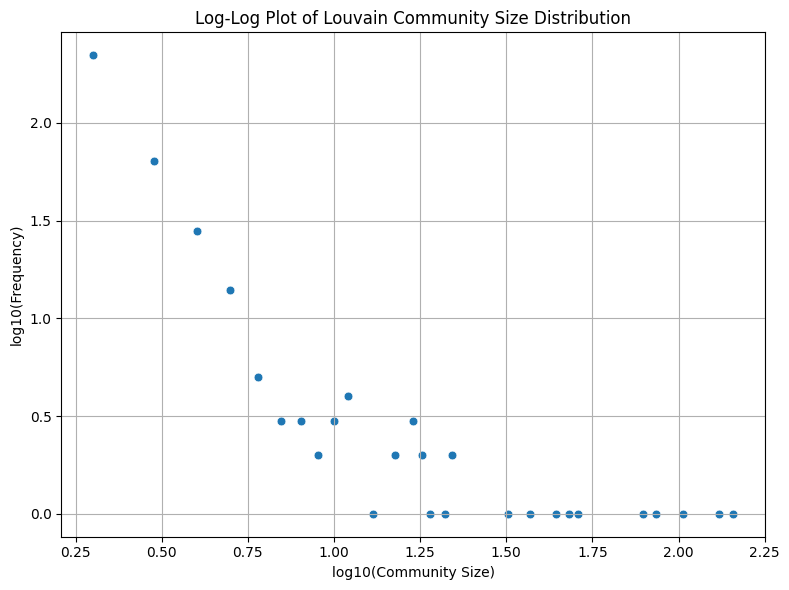

Slope: -0.977, R^2: 0.660


In [33]:
from collections import Counter

community_sizes = Counter(partition.values())  # community_id -> size
sizes = list(community_sizes.values())

# log-log plot, check if heavy-tailed distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

unique_sizes, counts = np.unique(sizes, return_counts=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log10(unique_sizes), y=np.log10(counts), s=40)
plt.xlabel("log10(Community Size)")
plt.ylabel("log10(Frequency)")
plt.title("Log-Log Plot of Louvain Community Size Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate slope and R^2
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(unique_sizes), np.log10(counts))
print(f"Slope: {slope:.3f}, R^2: {r_value**2:.3f}")
